# OpenCV Introduction

Kevin J. Walchko
created 20 July 2017

---

This notebook covers opening files, looking at pixels, and some simple image processing techniques we will use in class.

## References

- [handee opencv tutorials](https://github.com/handee/opencv-gettingstarted)

## Setup

In [4]:
from __future__ import print_function
# these imports let you use opencv
import cv2          # opencv itself
# import common       # some useful opencv functions
# import video        # some video stuff
import numpy as np  # matrix manipulations

%matplotlib inline 
from matplotlib import pyplot as plt           # this lets you draw inline pictures in the notebooks
import pylab                                   # this allows you to control figure size 
pylab.rcParams['figure.figsize'] = (10.0, 8.0) # this controls figure size in the notebook

Now we can open an image:

In [7]:
input_image=cv2.imread('noidea.jpg')

We can find out various things about that image

In [8]:
print(input_image.size)

776250


In [9]:
print(input_image.shape)

(414, 625, 3)


In [10]:
print(input_image.dtype)

uint8


**gotcha** that last one (datatype) is one of the tricky things about working in Python. As it's not strongly typed, Python will allow you to have arrays of different types but the same size, and some functions will return arrays of types that you probably don't want. Being able to check and inspect the datatype like this is very useful and is one of the things I often find myself doing in debugging.

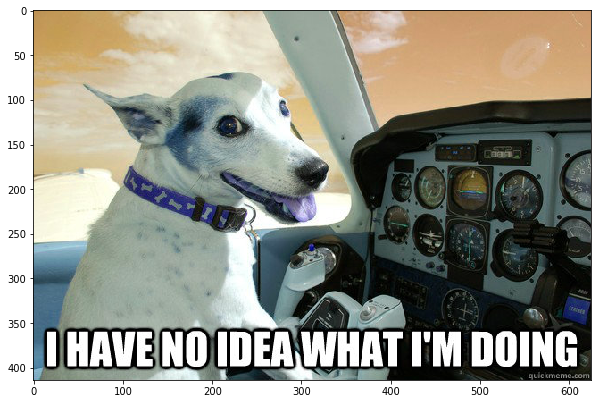

In [11]:
plt.imshow(input_image);

What this illustrates is something key about OpenCV: it doesn't store images in RGB format, but in BGR format.

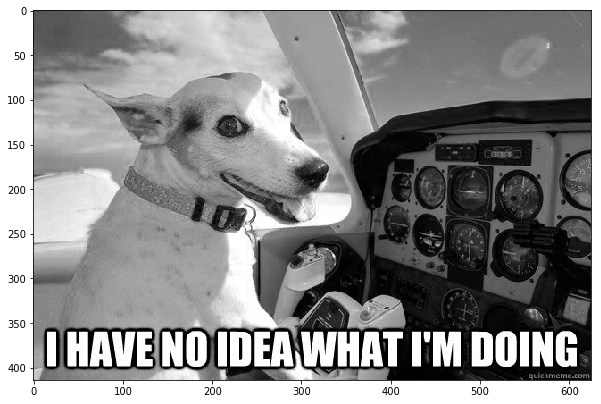

In [12]:
# split color channels out channels
b,g,r=cv2.split(input_image)
# show one of the channels (this is red - see that the sky is kind of dark. try changing it to b)
plt.imshow(r, cmap='gray');

## converting between colour spaces, merging and splitting channels

We can convert between various colourspaces in OpenCV easily. We've seen how to split, above. We can also merge channels:

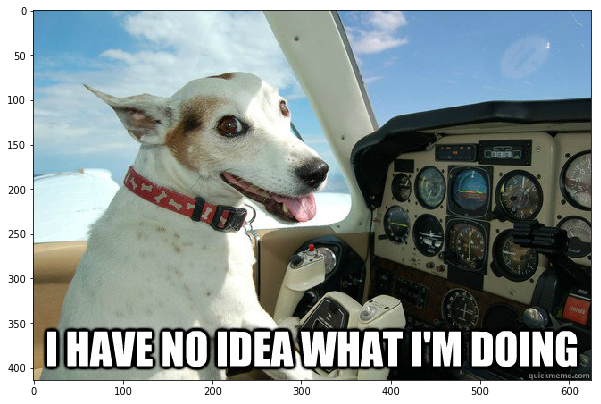

In [13]:
merged=cv2.merge([r,g,b])
# merge takes an array of single channel matrices
plt.imshow(merged);

OpenCV also has a function specifically for dealing with image colorspaces, so rather than split and merge channels by hand you can use this instead. It is usually marginally faster...

There are something like 250 color related flags in OpenCV for conversion and display. The ones you are most likely to use are COLOR_BGR2RGB for RGB conversion, COLOR_BGR2GRAY for conversion to greyscale, and COLOR_BGR2HSV for conversion to Hue,Saturation,Value colour space. [http://docs.opencv.org/trunk/de/d25/imgproc_color_conversions.html] has more information on how these colour conversions are done. 

In [14]:
COLORflags = [flag for flag in dir(cv2) if flag.startswith('COLOR') ]
print(len(COLORflags))
print(COLORflags)

287
['COLORMAP_AUTUMN', 'COLORMAP_BONE', 'COLORMAP_COOL', 'COLORMAP_HOT', 'COLORMAP_HSV', 'COLORMAP_JET', 'COLORMAP_OCEAN', 'COLORMAP_PARULA', 'COLORMAP_PINK', 'COLORMAP_RAINBOW', 'COLORMAP_SPRING', 'COLORMAP_SUMMER', 'COLORMAP_WINTER', 'COLOR_BAYER_BG2BGR', 'COLOR_BAYER_BG2BGRA', 'COLOR_BAYER_BG2BGR_EA', 'COLOR_BAYER_BG2BGR_VNG', 'COLOR_BAYER_BG2GRAY', 'COLOR_BAYER_BG2RGB', 'COLOR_BAYER_BG2RGBA', 'COLOR_BAYER_BG2RGB_EA', 'COLOR_BAYER_BG2RGB_VNG', 'COLOR_BAYER_GB2BGR', 'COLOR_BAYER_GB2BGRA', 'COLOR_BAYER_GB2BGR_EA', 'COLOR_BAYER_GB2BGR_VNG', 'COLOR_BAYER_GB2GRAY', 'COLOR_BAYER_GB2RGB', 'COLOR_BAYER_GB2RGBA', 'COLOR_BAYER_GB2RGB_EA', 'COLOR_BAYER_GB2RGB_VNG', 'COLOR_BAYER_GR2BGR', 'COLOR_BAYER_GR2BGRA', 'COLOR_BAYER_GR2BGR_EA', 'COLOR_BAYER_GR2BGR_VNG', 'COLOR_BAYER_GR2GRAY', 'COLOR_BAYER_GR2RGB', 'COLOR_BAYER_GR2RGBA', 'COLOR_BAYER_GR2RGB_EA', 'COLOR_BAYER_GR2RGB_VNG', 'COLOR_BAYER_RG2BGR', 'COLOR_BAYER_RG2BGRA', 'COLOR_BAYER_RG2BGR_EA', 'COLOR_BAYER_RG2BGR_VNG', 'COLOR_BAYER_RG2GRAY',

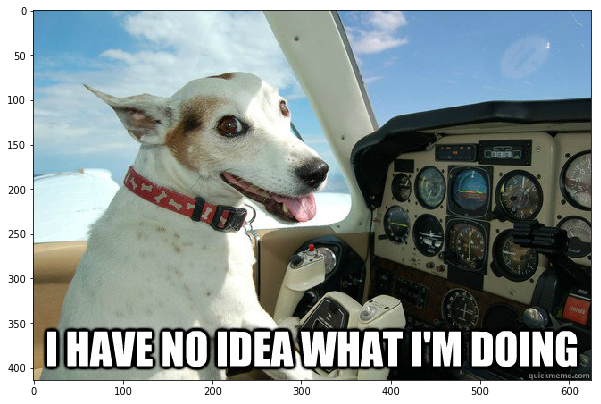

In [15]:
opencv_merged=cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)
plt.imshow(opencv_merged);

## Getting image data and setting image data

Images in python OpenCV are numpy arrays. Numpy arrays are optimised for fast array operations and so there are usually fast methods for doing array calculations which don't actually involve writing all the detail yourself. So it's usually bad practice to access individual pixels, but you can.

In [16]:
pixel = input_image[100,100]
print(pixel)

[150 161 153]


In [17]:
input_image[100,100] = [0,0,0]
pixelnew = input_image[100,100]
print(pixelnew)

[0 0 0]


## Getting and setting regions of an image

In the same way as we can get or set individual pixels, we can get or set regions of an image. This is a particularly useful way to get a region of interest to work on. In a lot of the OpenCV documentation, this is referred to as Region of Interest (ROI).

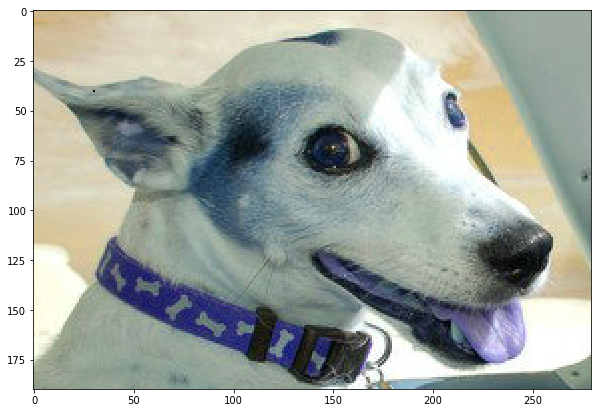

In [18]:
# this is essentially cropping an image
roi = input_image[60:250, 70:350]
plt.imshow(roi);

190
280


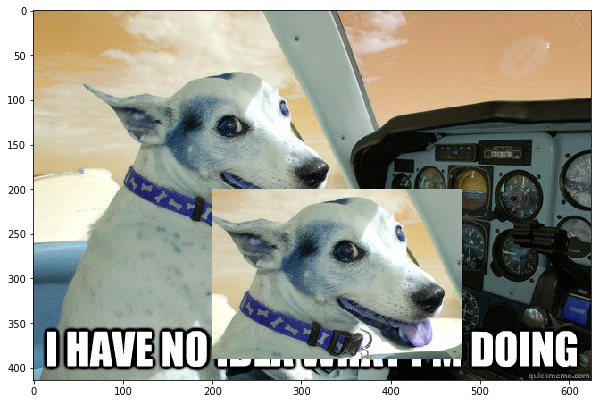

In [25]:
# grab a new copy
fresh_image=cv2.imread('noidea.jpg')

# paste the cropped/roi image over the fresh copy
# basically, you are setting a sub matrix of data equal to the roi
fresh_image[200:200+roi.shape[0], 200:200+roi.shape[1]]=roi
print(roi.shape[0])
print(roi.shape[1])
plt.imshow(fresh_image);

## Matrix slicing
In OpenCV python style, as I have mentioned, images are numpy arrays. There are some superb array manipulation in numpy tutorials out there: this is a great introduction if you've not done it before [http://www.scipy-lectures.org/intro/numpy/numpy.html#indexing-and-slicing]. The getting and setting of regions above uses slicing, though, and I'd like to finish this notebook with a little more detail on what is going on there. 

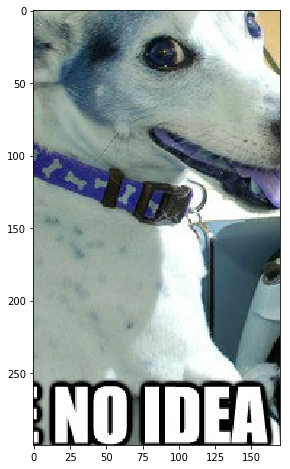

In [20]:
freshim2 = cv2.imread("noidea.jpg")
crop = freshim2[100:400, 130:300] 
plt.imshow(crop);

The key thing to note here is that the slicing works like
```
[top_y:bottom_y, left_x:right_x]
```
This can also be thought of as 
```
[y:y+height, x:x+width]
```

You can also use slicing to separate out channels.  In this case you want 
```
[y:y+height, x:x+width, channel]
```
where channel represents the colour you're interested in - this could be 0 = blue, 1 = green or 2=red if you're dealing with a default OpenCV image, but if you've got an image that has been converted it could be something else. Here's an example that converts to HSV then selects the S (Saturation) channel of the same crop above:

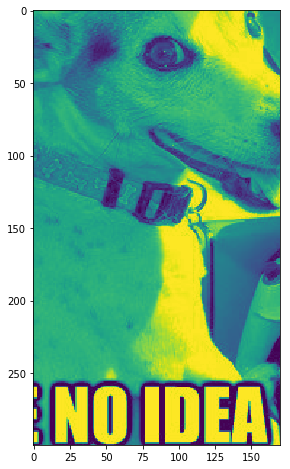

In [21]:
# where channel is:
# 0 - blue
# 1 - green
# 2 - red
# remember, opencv holds image info as BGR not RGB
crop = freshim2[100:400, 130:300, 2] 
plt.imshow(crop);

## Basic manipulations

Rotate, flip... 

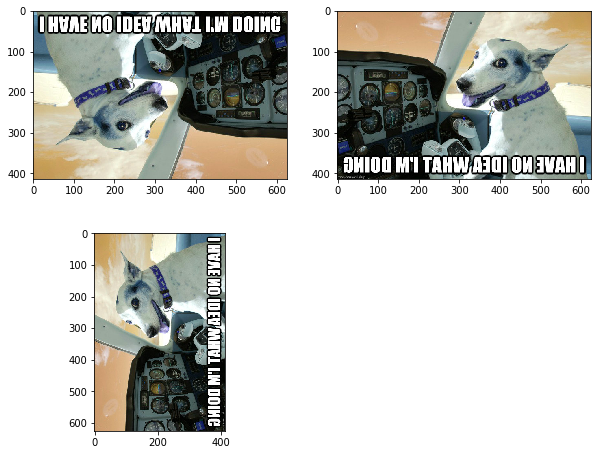

In [22]:
plt.subplot(2,2,1)
flipped_code_0=cv2.flip(input_image,0) # vertical flip
plt.imshow(flipped_code_0);

plt.subplot(2,2,2)
flipped_code_1=cv2.flip(input_image,1) # horizontal flip
plt.imshow(flipped_code_1);

plt.subplot(2,2,3)
transposed=cv2.transpose(input_image) # effectively a rotation
plt.imshow(transposed);


-----------

<a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-sa/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/">Creative Commons Attribution-ShareAlike 4.0 International License</a>.